In [3]:
import gym
import numpy as np
from IPython.display import clear_output
import random
from time import sleep
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
#Implement the taxi environment
env = gym.make("Taxi-v3").env
print("Number of action:",env.action_space)
print("Number of state for taxi:",env.observation_space)

Number of action: Discrete(6)
Number of state for taxi: Discrete(500)


In [5]:
#Initial the state with the same as instruction (taxi column 3, taxi row 1, passenger location index 0, destination index 2)
state = env.encode(3, 1, 2, 0) 
print("Current state of taxi:", state)

#Set the state = 328 follow the instruction to start with, then render out the visualization
env.s = state
env.reset()
env.render()

Current state of taxi: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [6]:
space_numb = env.observation_space.n   
action_numb = env.action_space.n       
Qtable = np.zeros([space_numb,action_numb])

In [7]:
def policy(state):
    return np.argmax(Qtable[state])

In [8]:
#Initialize 3 hyperparameter alpha, gamma and epsilon following the standard values from instruction
alpha = 0.1
gamma = 0.6
epsilon = 0.1

In [9]:
#Array for solve speed for this problem
solvespeed_array =[]

#For loop training, update the Q-table through 10000 episode
for index in range(10000):
    #Set initialize state of the environment to be random
    state = env.reset()
    
    #Initialize penalty - reward variable = 0 and done boolean = False
    rw = 0
    pen = 0
    done = False
    
    #Storing variable for training evaluation and plotting
    solvespeed =0
    
    #Create a loop
    while (done!=True):        
        #Draw a random action to exloit the computed Q-value
        #then update the next state it'll take, reward, done boolean and info variable
        action = policy(state)
        next_state, rw, done, _ = env.step(action)
        
        #Update the next action using the same policy
        next_action = policy(next_state)
        
        #Update new Qvalue for an action in the state space using the TD(0) learning formula:
        old_value = Qtable[state, action]
        new_value = old_value + alpha*(rw + gamma *Qtable[next_state,next_action] - old_value)    
        Qtable[state, action] = new_value

        #Increase penalty for wrong pickup/dropoff action (Which has reward = -10)
        if rw == -10:
            pen += 1
        #Declare the next state after taking the action from current state
        state = next_state
        
        #Update the sove speed counter
        solvespeed+=1
        
    solvespeed_array.append(solvespeed)
       
print("Done.\n")

Done.



Text(0.5, 0, 'Steps to Complete')

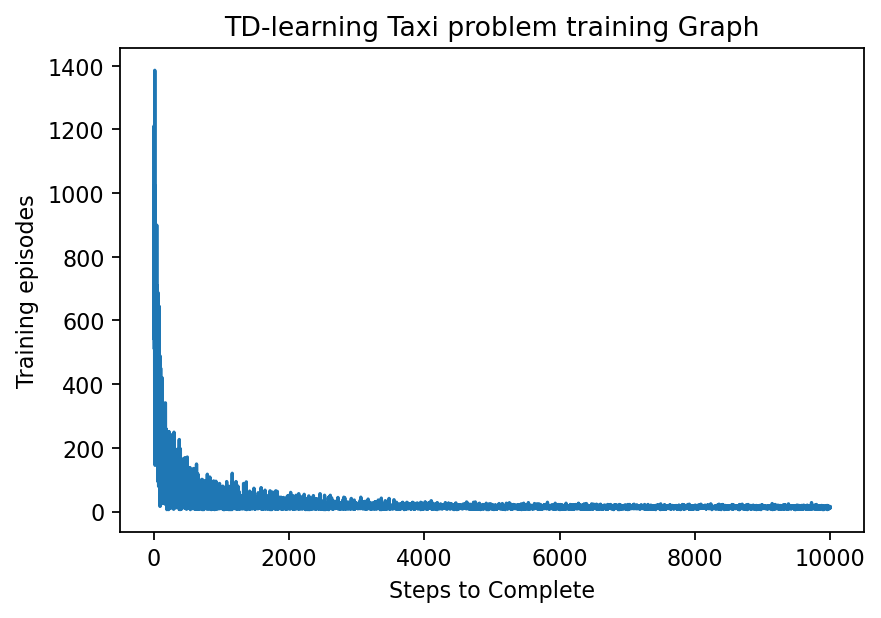

In [10]:
#Create variable x to store training episodes order for the first 2000 episodes in our training 
x = []
for i in range (1,10001):
    x.append(i)
    
#y is the number of step for successful solve Taxi problem for each episode in our first 2000 episodes of training (recorded above)
y = solvespeed_array[0:10000]

#Graph
fig, ax = plt.subplots(figsize=(6, 4), dpi=160)
ax.plot(x, y)

#Name the elements
ax.set_title('TD-learning Taxi problem training Graph')
ax.set_ylabel('Training episodes')
ax.set_xlabel('Steps to Complete')